In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

from migrator import *
from plotter import *
from co2_migrator import *

In [2]:
!pip install tabulate
!pip install seaborn

In [8]:
# read all the metamodels from metamodels folder
metamodels = []
SCALE_TO_MARCONI = 2982 / 150
for file in os.listdir("metamodels"):
    country_code = file[:2]
    if country_code == "eu":
        country_code = file[:6]

    metamodels.append(
        MetaModel(
            country_code = country_code,
            co2_emissions = pd.read_parquet("metamodels/" + file)["carbon_emission"].values
        )
    )


In [9]:
for metamodel in metamodels:
    metamodel.total_emissions *= SCALE_TO_MARCONI # to the scale of marconi, data represented in tons

In [10]:
# Create a list of data
data = [(metamodel.country_code, metamodel.total_emissions) for metamodel in metamodels]

countries = [metamodel.country_code for metamodel in metamodels]
total_co2 = [metamodel.total_emissions for metamodel in metamodels]

print("Country \t Total tCO2")
for metamodel in metamodels:
    print(f"{metamodel.country_code:<15}{metamodel.total_emissions:>0.2f}")

Country 	 Total tCO2
cz             3684935.53
pt             1643449.18
sk             733849.13
eu_08h         45844.87
dk             1711712.53
lv             45844.87
it             2137275.54
si             3397083.47
lu             717153.90
ee             3903682.33
gr             2726543.99
lt             919086.39
at             1129741.04
pl             9332563.02
es             5658299.87
rs             7365438.02
fi             189435.72
bg             5151212.76
fr             179296.92
hr             374257.90
mk             13684059.05
de             13563432.37
se             120251.73
eu_01h         45844.87
no             115948.31
be             726255.36
ro             2968721.95
eu_15m         45844.87
nl             7029690.26
ch             74318.40
eu_24h         45844.87
hu             9064605.47
ba             7610256.84
eu_04h         45844.87


In [6]:
# Create a DataFrame from the metamodel data
data = pd.DataFrame({
    'Country': [metamodel.country_code for metamodel in metamodels],
    'Total CO2': [metamodel.total_emissions for metamodel in metamodels]
})

/var/folders/0l/v3bdnpq11fbfhlwsbhdph8c80000gn/T/ipykernel_19305/2147508747.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


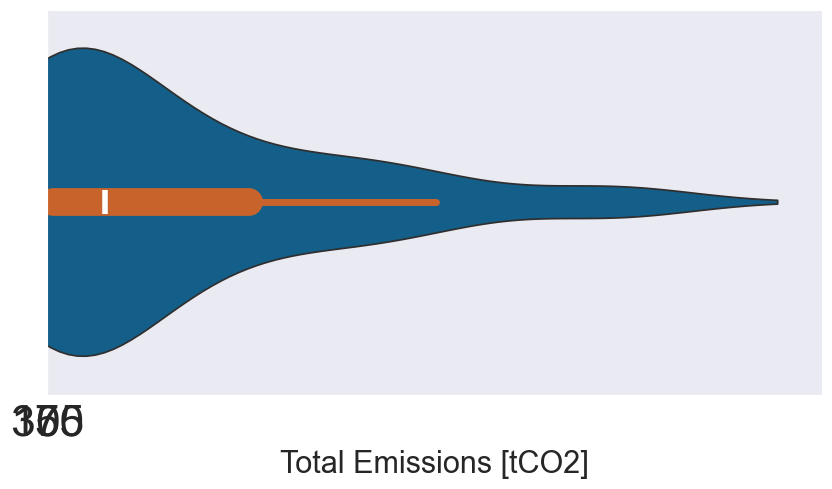

In [7]:
plt.figure(figsize=(10, 5))
sns.violinplot(
    x=total_co2,
    inner_kws=dict(box_width=20, whis_width=5, color='#C8642B'),
    color='#00649D',
    # minimum of x is 0
    scale='width'
)
plt.xlabel('Total Emissions [tCO2]', fontsize=22)
# minimum on x axis is 0
plt.xlim(0)
plt.xticks(fontsize=32, ticks=[0, 175, 350])
plt.show()

In [48]:
pd.read_parquet("metamodels/15min.parquet")["carbon_emission"].sum()

2306.0796800251405

In [52]:
pd.read_parquet("metamodels/24h.parquet")["carbon_emission"].sum()

2306.0796800251405

In [50]:
pd.read_parquet("inputs/co2/EU-migration=15min-2023-06.parquet")["carbon_intensity"].sum()

3239.3405229652344

In [51]:
pd.read_parquet("inputs/co2/EU-migration=24h-2023-06.parquet")["carbon_intensity"].sum()

6446.059957406895

In [65]:
watts = pd.read_parquet("outputs/raw-output/metamodel/seed=0/power_draw.parquet")["power_draw"].sum()

In [66]:
# average carbon emission per kilowatt hours
# divide by the

gCO2perWatt = pd.read_parquet("inputs/co2/EU-migration=15min-2023-06.parquet")["carbon_intensity"].sum() / len(pd.read_parquet("inputs/co2/EU-migration=15min-2023-06.parquet")["carbon_intensity"])
gco2 = gCO2perWatt * watts
gco2

15987861.867651964

In [67]:
tonsCO2 = gco2 / 1000000

In [68]:
tonsCO2

15.987861867651963